# Train Similarity Search Algorithm

This notebook trains a model on the previously extracted image features which will search for the most similar image



In [64]:
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [113]:
def load_features():

    fldr_path = os.path.join('..', 'data','processed')
    fname = 'features_202010121706.csv'
    fpath = os.path.join(fldr_path, fname)

    with open(fpath,'r') as dest_f:
        data_reader = csv.reader(dest_f,
                               delimiter = ',')
        next(data_reader) #skips the header/first line
        data = [data for data in data_reader]

    data_array = np.asarray(data, dtype=np.float32)
    labels = data_array[:,0].astype(int)
    features_list = data_array[:,1:].tolist()

    return labels, features_list 

In [170]:
def load_metadata():
    # load metadata file
    fldr_path = os.path.join('..', 'data','interim')
    fname = 'graphik_portal_202010121646.csv'
    fpath = os.path.join(fldr_path, fname)

    df = pd.read_csv(fpath, index_col=0)
    
    return df

In [234]:

def plot_similar_images(j, df, labels, features_list):
    """
    j: index (of labels list) to look up
    df: df with image metadata
    labels: true labels. list with the object ids for all the images
    features_list: list of numpy arrays with the extracted features
    """
    
    # look up true image
    true_label = labels[j]
    true_metadata = df.loc[true_label,:]

    # look up similar images
    distances, indices = neighbors.kneighbors([features_list[j]])
    object_ids = labels[indices.tolist()[0]]
    tdf = df.loc[object_ids,:]

    # plot results
    num_plots = min(tdf.shape[0], 10)
    fig, axs = plt.subplots(nrows=1+num_plots,ncols=1,figsize=(8,int(num_plots*4)))

    # show true image
    axs[0].set_title('original image: ' + true_metadata['title'], fontdict={'fontweight' : 750} )
    # axs[0].axis('off')
    im = plt.imread(true_metadata['img_path'])
    axs[0].imshow(im)
    axs[0].spines['bottom'].set_visible(True)
    axs[0].spines['bottom'].set_linewidth(3)

    # show similar images
    for i, (idx, row) in enumerate(tdf.iterrows()):

        axs[i+1].set_title(str(i+1) + ': ' + row['title'])
        im = plt.imread(row['img_path'])
        axs[i+1].axis('off')
        axs[i+1].imshow(im)

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    for sp_name in axs[0].spines:

        axs[0].spines[sp_name].set_visible(True)
        axs[0].spines[sp_name].set_linewidth(3)

    fig.tight_layout()
    plt.show()

    _ = [print(str(i+1),': ', row['detail_url']) for i, (idx, row) in enumerate(tdf.iterrows())]
    
    return object_ids, true_metadata

# Load Data

In [114]:
labels, features_list  = load_features()

# Train NearestNeighbors

In [205]:
neighbors = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean').fit(features_list)

# Test results

In [68]:
df = load_metadata()
df.head()

,title,img_url,detail_url,detail_description,img_path
object_id,,,,,
3,Marcus Curtius stürzt sich in die Erdspalte,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,Monogrammist IB [Nagler III 1950] (Erwähnt um ...,../data/processed/images/0/3.png
18,Die Philister bringen die Bundeslade in den Te...,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,"Battista Franco (Um 1510 - 1561), Um 1525 - 1561",../data/processed/images/0/18.png
19,Der grosse Saal im Schloss in Prag [Linke Bild...,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,Egidius Sadeler (der Jüngere) (Um 1570 - 1629)...,../data/processed/images/0/19.png
33,Die schöne Försterin,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,"Henry Wyatt (1794 - 1840), nach, 1835, Francis...",../data/processed/images/0/33.png
52,Stigmatisation des heiligen Franziskus,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,"Agostino Carracci (1557 - 1602), Ca. 1583",../data/processed/images/0/52.png


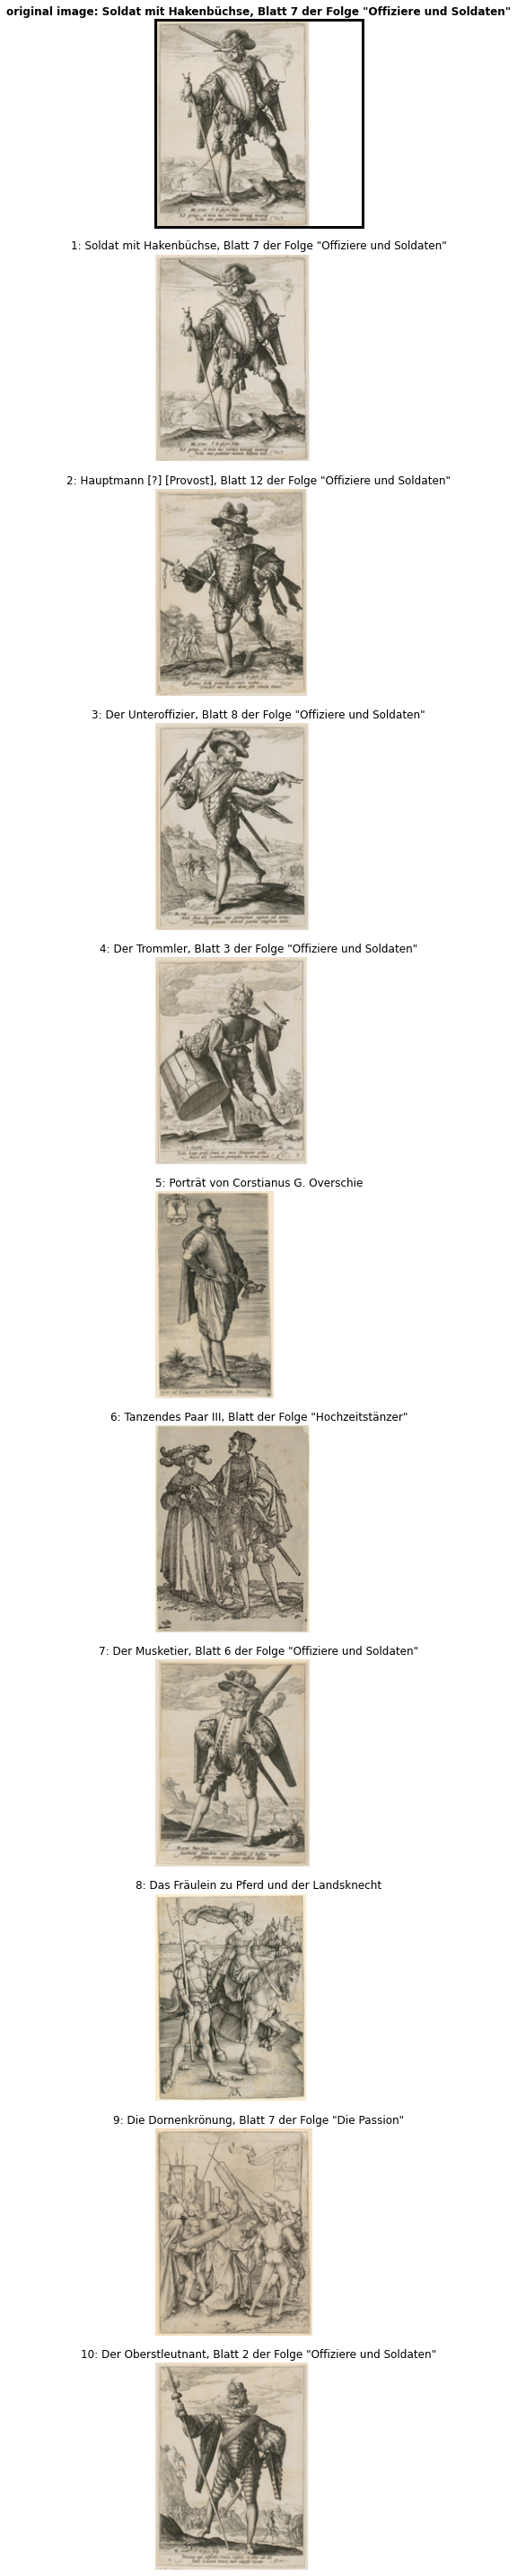

1 :  https://www.graphikportal.org/document/gpo00222833?medium=28D12183
2 :  https://www.graphikportal.org/document/gpo00225807?medium=28EE2187
3 :  https://www.graphikportal.org/document/gpo00225728?medium=28F2218D
4 :  https://www.graphikportal.org/document/gpo00222392?medium=28E62188
5 :  https://www.graphikportal.org/document/gpo00219875?medium=28C0217D
6 :  https://www.graphikportal.org/document/gpo00226970?medium=28D62184
7 :  https://www.graphikportal.org/document/gpo00224400?medium=28DB2182
8 :  https://www.graphikportal.org/document/gpo00220421?medium=28D02181
9 :  https://www.graphikportal.org/document/gpo00219445?medium=28B12176
10 :  https://www.graphikportal.org/document/gpo00226095?medium=29002192


In [236]:
j=5678
object_ids, true_metadata = plot_similar_images(j, df, labels, features_list)

In [237]:
fig.savefig('{}: {}.png'.format(j,true_metadata['title']))